### 网络科学理论简介
***
***
# 网络科学：描述节点属性
***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

http://networkx.readthedocs.org/en/networkx-1.11/tutorial/

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [6]:
import networkx as nx

G=nx.Graph() # G = nx.DiGraph() # 有向网络
# 添加（孤立）节点
G.add_node("spam")
# 添加节点和链接
G.add_edge(1,2)

print(G.nodes())

print(G.edges())

[1, 2, 'spam']
[(1, 2)]


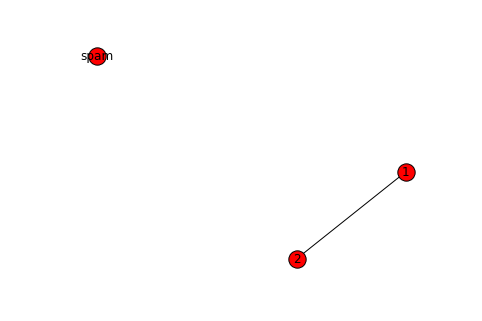

In [5]:
# 绘制网络
nx.draw(G, with_labels = True)

# WWW Data download 

http://www3.nd.edu/~networks/resources.htm

World-Wide-Web: [README] [DATA]
Réka Albert, Hawoong Jeong and Albert-László Barabási:
Diameter of the World Wide Web Nature 401, 130 (1999) [ PDF ]

# 作业：

- 下载www数据
- 构建networkx的网络对象g（提示：有向网络）
- 将www数据添加到g当中
- 计算网络中的节点数量和链接数量


In [ ]:
G = nx.Graph()
n = 0
with open ('/Users/chengjun/bigdata/www.dat.gz.txt') as f:
    for line in f:
        n += 1
        if n % 10**4 == 0:
            flushPrint(n)
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)

In [ ]:
nx.info(G)

# 描述网络
### nx.karate_club_graph

我们从karate_club_graph开始，探索网络的基本性质。

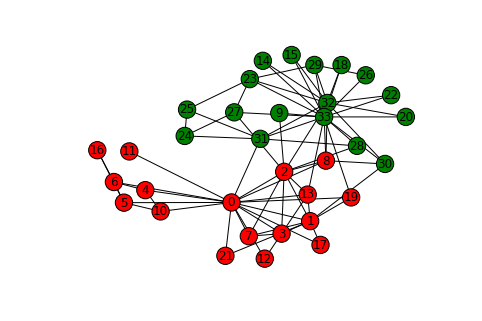

In [23]:
G = nx.karate_club_graph()
 
clubs = [G.node[i]['club'] for i in G.nodes()]
colors = []
for j in clubs:
    if j == 'Mr. Hi':
        colors.append('r')
    else:
        colors.append('g')
 
nx.draw(G,  with_labels = True, node_color = colors)

In [57]:
G.node[1] # 节点1的属性

{'club': 'Mr. Hi'}

In [64]:
G.edge.keys()[:3] # 前三条边的id

[0, 1, 2]

In [9]:
nx.info(G)

"Name: Zachary's Karate Club\nType: Graph\nNumber of nodes: 34\nNumber of edges: 78\nAverage degree:   4.5882"

In [11]:
G.nodes()[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
G.edges()[:3]

[(0, 1), (0, 2), (0, 3)]

In [78]:
G.neighbors(1)

[0, 2, 3, 7, 13, 17, 19, 21, 30]

In [51]:
nx.average_shortest_path_length(G) 

2.408199643493761

### 网络直径

In [49]:
nx.diameter(G)#返回图G的直径（最长最短路径的长度）

5

### 密度

In [136]:
nx.density(G)

0.13903743315508021

In [138]:
nodeNum = len(G.nodes())
edgeNum = len(G.edges())

2.0*edgeNum/(nodeNum * (nodeNum - 1))

0.13903743315508021

# 作业：
- 计算www网络的网络密度

### 聚集系数

In [48]:
cc = nx.clustering(G)
cc.items()[:5]

[(0, 0.15),
 (1, 0.3333333333333333),
 (2, 0.24444444444444444),
 (3, 0.6666666666666666),
 (4, 0.6666666666666666)]

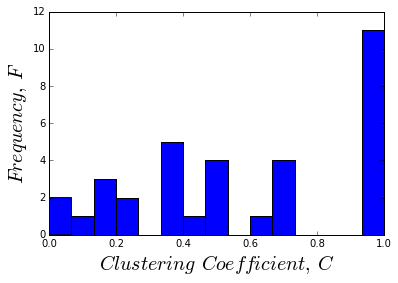

In [97]:
plt.hist(cc.values(), bins = 15)
plt.xlabel('$Clustering \, Coefficient, \, C$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)
plt.show()

#### Spacing in Math Mode


In a math environment, LaTeX ignores the spaces you type and puts in the spacing that it thinks is best. LaTeX formats mathematics the way it's done in mathematics texts. If you want different spacing, LaTeX provides the following four commands for use in math mode:

\; - a thick space

\: - a medium space

\, - a thin space

\\! - a negative thin space

### 匹配系数

In [67]:
# M. E. J. Newman, Mixing patterns in networks Physical Review E, 67 026126, 2003
nx.degree_assortativity_coefficient(G) #计算一个图的度匹配性。

-0.47561309768461457

In [65]:
Ge=nx.Graph()
Ge.add_nodes_from([0,1],size=2)
Ge.add_nodes_from([2,3],size=3)
Ge.add_edges_from([(0,1),(2,3)])
print(nx.numeric_assortativity_coefficient(Ge,'size'))

1.0


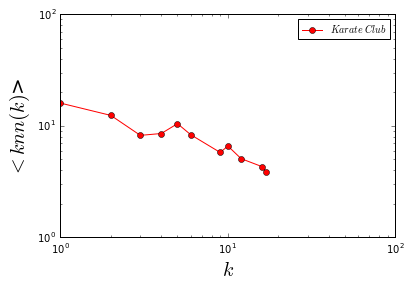

In [28]:
# plot degree correlation  
from collections import defaultdict
import numpy as np

l=defaultdict(list)
g = nx.karate_club_graph()

for i in g.nodes():
    k = []
    for j in g.neighbors(i):
        k.append(g.degree(j))
    l[g.degree(i)].append(np.mean(k))   
    #l.append([g.degree(i),np.mean(k)])
  
x = l.keys()
y = [np.mean(i) for i in l.values()]

#x, y = np.array(l).T
plt.plot(x, y, 'r-o', label = '$Karate\;Club$')
plt.legend(loc=1,fontsize=10, numpoints=1)
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'$<knn(k)$> ', fontsize = 20)
plt.xlabel('$k$', fontsize = 20)
plt.show()

# Degree centrality measures.（度中心性）
* degree_centrality(G)        # Compute the degree centrality for nodes.
* in_degree_centrality(G)     # Compute the in-degree centrality for nodes.
* out_degree_centrality(G)    # Compute the out-degree centrality for nodes.
* closeness_centrality(G[, v, weighted_edges])   #  Compute closeness centrality for nodes.
* betweenness_centrality(G[, normalized, ...])  #  Betweenness centrality measures.（介数中心性）

In [103]:
dc = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness= nx.betweenness_centrality(G)


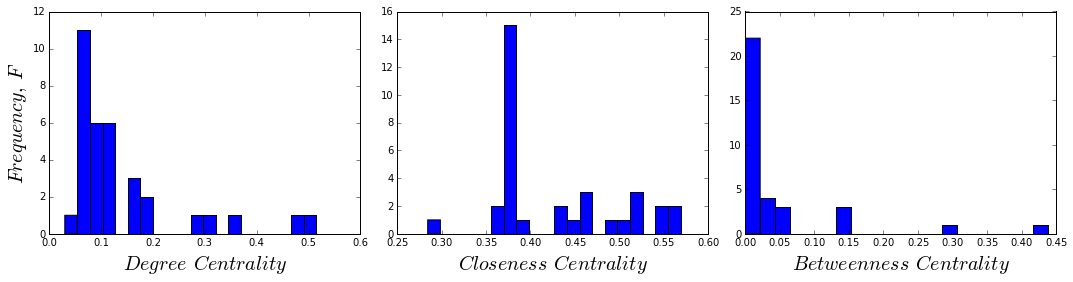

In [114]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(dc.values(), bins = 20)
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(closeness.values(), bins = 20)
plt.xlabel('$Closeness \, Centrality$', fontsize = 20)

ax = plt.subplot(1, 3, 3)
plt.hist(betweenness.values(), bins = 20)
plt.xlabel('$Betweenness \, Centrality$', fontsize = 20)
plt.tight_layout()
plt.show()


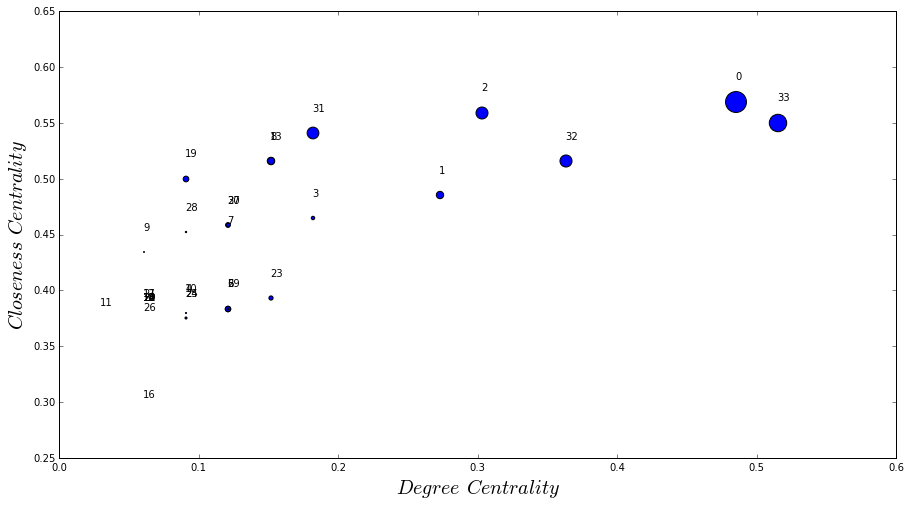

In [135]:
fig = plt.figure(figsize=(15, 8),facecolor='white')

for k in betweenness:
    plt.scatter(dc[k], closeness[k], s = betweenness[k]*1000)
    plt.text(dc[k], closeness[k]+0.02, str(k))
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Closeness \, Centrality$', fontsize = 20)
plt.show()

# 度分布

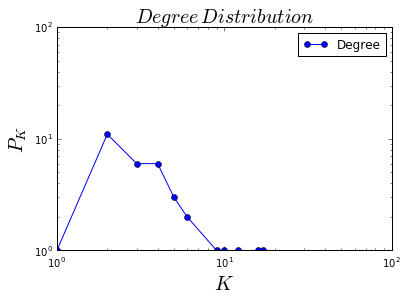

In [7]:
from collections import defaultdict
import numpy as np

def plotDegreeDistribution(G):
    degs = defaultdict(int)
    for i in G.degree().values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P_K$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()   
    
G = nx.karate_club_graph()     
plotDegreeDistribution(G)

### 网络科学理论简介
***
***
# 网络科学：分析网络结构
***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

# 规则网络

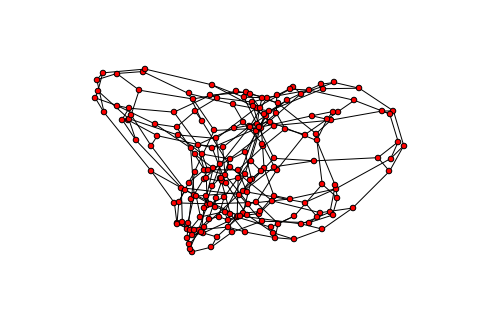

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
RG = nx.random_graphs.random_regular_graph(3,200)  #生成包含20个节点、每个节点有3个邻居的规则图RG
pos = nx.spectral_layout(RG)          #定义一个布局，此处采用了spectral布局方式，后变还会介绍其它布局方式，注意图形上的区别
nx.draw(RG,pos,with_labels=False,node_size = 30)  #绘制规则图的图形，with_labels决定节点是非带标签（编号），node_size是节点的直径
plt.show()  #显示图形

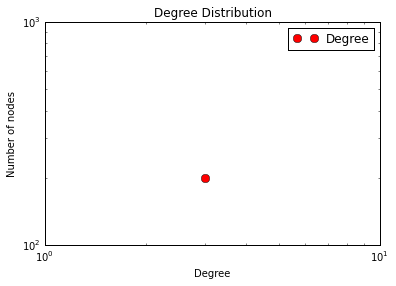

In [38]:
plotDegreeDistribution(RG)

# ER随机网络

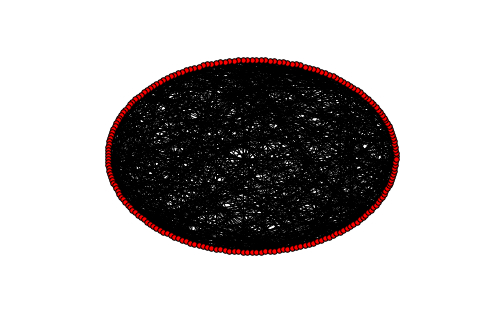

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
ER = nx.random_graphs.erdos_renyi_graph(200,0.05)  #生成包含20个节点、以概率0.2连接的随机图
pos = nx.shell_layout(ER)          #定义一个布局，此处采用了shell布局方式
nx.draw(ER,pos,with_labels=False,node_size = 30) 
plt.show()

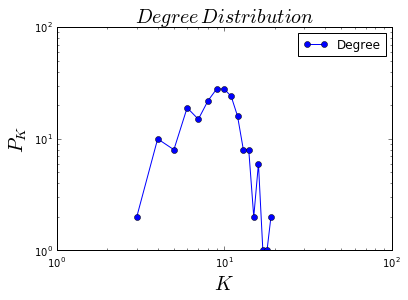

In [9]:
plotDegreeDistribution(ER)

# 小世界网络

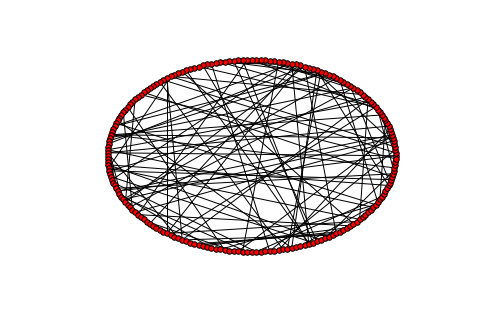

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
WS = nx.random_graphs.watts_strogatz_graph(200,4,0.3)  #生成包含200个节点、每个节点4个近邻、随机化重连概率为0.3的小世界网络
pos = nx.circular_layout(WS)          #定义一个布局，此处采用了circular布局方式
nx.draw(WS,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

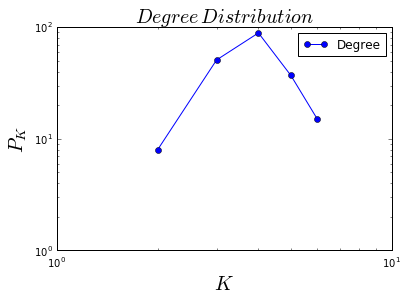

In [11]:
plotDegreeDistribution(WS)

In [12]:
nx.diameter(WS)

9

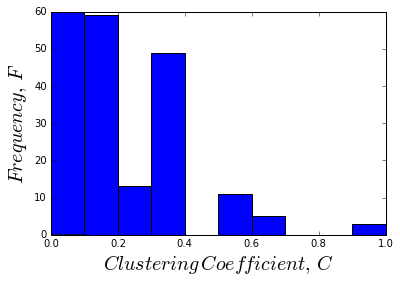

In [13]:
cc = nx.clustering(WS)
plt.hist(cc.values(), bins = 10)
plt.xlabel('$Clustering \, Coefficient, \, C$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)
plt.show()

In [14]:
import numpy as np
np.mean(cc.values())

0.19566666666666663

# BA网络

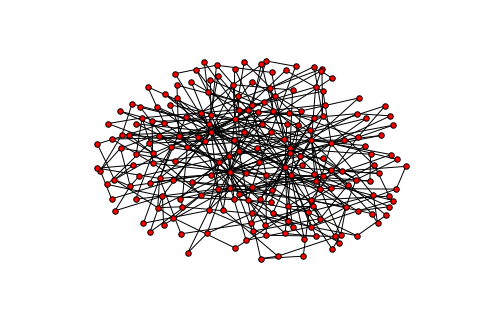

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
BA= nx.random_graphs.barabasi_albert_graph(200,2)  #生成n=20、m=1的BA无标度网络
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

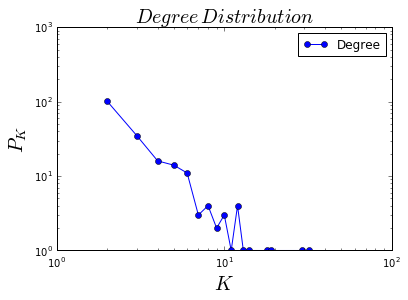

In [16]:
plotDegreeDistribution(BA)

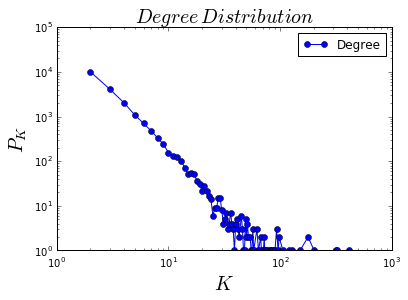

In [17]:
BA= nx.random_graphs.barabasi_albert_graph(20000,2)  #生成n=20、m=1的BA无标度网络
plotDegreeDistribution(BA)


# 作业：

- 阅读 Barabasi (1999) Internet Diameter of the world wide web.Nature.401
- 绘制www网络的出度分布、入度分布
- 使用BA模型生成节点数为N、幂指数为$\gamma$的网络
- 计算平均路径长度d与节点数量的关系

<img src = './img/diameter.png' width = 10000>

In [17]:
Ns = [i*10 for i in [1, 10, 100, 1000]]
ds = []
for N in Ns:
    print N
    BA= nx.random_graphs.barabasi_albert_graph(N,2)
    d = nx.average_shortest_path_length(BA)
    ds.append(d)

10
100
1000
10000


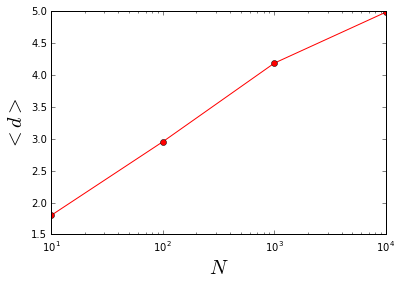

In [19]:
plt.plot(Ns, ds, 'r-o')
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('$<d>$', fontsize = 20)
plt.xscale('log')
plt.show()

# More

http://computational-communication.com/wiki/index.php?title=Networkx

In [16]:
# subgraph
G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_path([0,1,2,3])
H = G.subgraph([0,1,2])
G.edges(), H.edges()

([(0, 1), (1, 2), (2, 3)], [(0, 1), (1, 2)])

# 参考

* https://networkx.readthedocs.org/en/stable/tutorial/tutorial.html